# Getting Started
Basics of *machine learning*


## Let's Go


# 1.Pima Prediction


In [1]:
import pandas as pd #data frames
import matplotlib.pyplot as plt #2D plotting
import numpy as np #scientific computing

%matplotlib inline

In [9]:
col_names=['num_preg','gluc_conc','diastolic_bp','thickness','insulin','bmi','diab_pred','age','diabetes'] 
df=pd.read_csv("/Users/ShreyaSabu/Desktop/pima-data.csv", names=col_names)
df.shape

(768, 9)

In [12]:
df.head(3)
df.tail(3)

,num_preg,gluc_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [13]:
df.isnull().values.any()

False

In [24]:
def plot_corr(df,size=10):
    corr=df.corr()
    fig,ax=plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)),corr.columns)
    plt.yticks(range(len(corr.columns)),corr.columns)

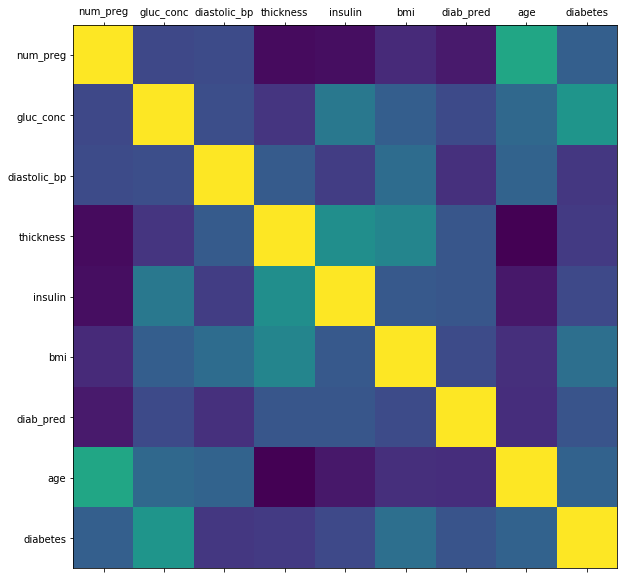

In [25]:
plot_corr(df)

In [26]:
df.corr()

,num_preg,gluc_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
gluc_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [54]:
num_true=len(df.loc[df['diabetes']==1])
print num_true
num_false=len(df.loc[df['diabetes']==0])
print num_false
print ("Number of true cases: {0} ({1:2.2f}%)".format(num_true, float(num_true*100)/(num_true+num_false)))
print ("Number of false cases: {0} ({1:2.2f}%)".format(num_false, float(num_false* 100) / (num_true + num_false)))

268
500
Number of true cases: 268 (34.90%)
Number of false cases: 500 (65.10%)


In [63]:
from sklearn.cross_validation import train_test_split
feature_col_names=['num_preg','gluc_conc','diastolic_bp','thickness','insulin','bmi','diab_pred','age']
predicted_class_name=['diabetes']
x=df[feature_col_names].values
y=df[predicted_class_name].values
split_test_size=0.30
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=split_test_size,random_state=42)
print("{0:0.2f}% in training set".format(float (len(x_train)*100/len(df.index))))
print("{0:0.2f}% in test set".format(float (len(x_test)*100/len(df.index))))

69.00% in training set
30.00% in test set


In [75]:
print("Training true :{0} {1:2.2f}%".format(len(y_train[y_train[:]==1]),float(len(y_train[y_train[:]==1])*100/len(y_train))))
print("Training false :{0} {1:2.2f}%".format(len(y_train[y_train[:]==0]),float(len(y_train[y_train[:]==0])*100/len(y_train))))

print("Test true :{0} {1:2.2f}%".format(len(y_test[y_test[:]==1]),float(len(y_test[y_test[:]==1])*100/len(y_test))))
print("Test false :{0} {1:2.2f}%".format(len(y_test[y_test[:]==0]),float(len(y_test[y_test[:]==0])*100/len(y_test))))


Training true :188 35.00%
Training false :349 64.00%
Test true :80 34.00%
Test false :151 65.00%


In [76]:
from sklearn.preprocessing import Imputer
fill_0=Imputer(missing_values=0,strategy="mean",axis=0)
x_train=fill_0.fit_transform(x_train)
x_test=fill_0.fit_transform(x_test)


In [84]:
from sklearn.naive_bayes import GaussianNB
nb_model=GaussianNB()
nb_model.fit(x_train,y_train.ravel())

GaussianNB(priors=None)


In [85]:
nb_predict_train=nb_model.predict(x_train)
from sklearn import metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train,nb_predict_train)))

Accuracy: 0.7542


In [87]:
nb_predict_test=nb_model.predict(x_test)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test,nb_predict_test)))

Accuracy: 0.7359


In [89]:
print "Confusion Matrix"
print "{0}".format(metrics.confusion_matrix(y_test,nb_predict_test))

Confusion Matrix
[[118  33]
 [ 28  52]]


In [90]:
print "Classification Report"
print(metrics.classification_report(y_test,nb_predict_test))

Classification Report
             precision    recall  f1-score   support

          0       0.81      0.78      0.79       151
          1       0.61      0.65      0.63        80

avg / total       0.74      0.74      0.74       231



In [107]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression(C=0.7,random_state=42)
lr_model.fit(x_train,y_train.ravel())
lr_predict_test=lr_model.predict(x_test)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test,lr_predict_test)))
print "Classification Report"
print(metrics.classification_report(y_test,lr_predict_test))

Accuracy: 0.7446
Classification Report
             precision    recall  f1-score   support

          0       0.78      0.85      0.81       151
          1       0.66      0.55      0.60        80

avg / total       0.74      0.74      0.74       231



from sklearn.linear_model import LinearRegression
lr_model=LinearRegression(c=0.7,random_state=42)
lr_model.fit(x_train,y_train.ravel())
lr_predict_train=lr_model.predict(x_train)

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train,lr_predict_train)))

In [119]:
c_start=0.1
c_end=5.0
c_inc=0.1
c_values,recall_scores=[],[]
c_val=c_start
best_recall_score=0
while(c_val<c_end):
    c_values.append(c_val)
    lr_model_loop=LogisticRegression(C=c_val,class_weight="balanced",random_state=42)
    lr_model_loop.fit(x_train,y_train.ravel())
    lr_predict_loop_test=lr_model_loop.predict(x_test)
    recall_score=metrics.recall_score(y_test,lr_predict_loop_test)
    recall_scores.append(recall_score)
    if(recall_score>best_recall_score):
        best_recall_score=recall_score
        best_lr_predict_test=lr_predict_loop_test
    c_val=c_val+c_inc
best_score_c_val=c_values[recall_scores.index(best_recall_score)]
print ("max value of {0:0.3f} occured at C={1:.3f}".format(best_recall_score,best_score_c_val))


max value of 0.738 occured at C=0.300


Text(0,0.5,u'recall scores')

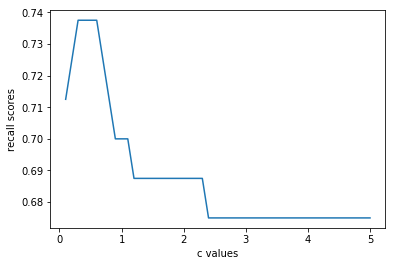

In [120]:
%matplotlib inline
plt.plot(c_values,recall_scores,"-")
plt.xlabel("c values")
plt.ylabel("recall scores")

In [121]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression(class_weight="balanced",C=0.3,random_state=42)
lr_model.fit(x_train,y_train.ravel())
lr_predict_test=lr_model.predict(x_test)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test,lr_predict_test)))
print "Classification Report"
print(metrics.classification_report(y_test,lr_predict_test))

Accuracy: 0.7143
Classification Report
             precision    recall  f1-score   support

          0       0.83      0.70      0.76       151
          1       0.57      0.74      0.64        80

avg / total       0.74      0.71      0.72       231



In [154]:
from sklearn.linear_model import LogisticRegressionCV
lr_cv_model=LogisticRegressionCV(n_jobs=-1,cv=10,Cs=3,class_weight="balanced",random_state=42)
lr_cv_model



LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=-1, penalty='l2', random_state=42,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [157]:
lr_cv_model.fit(x_train,y_train.ravel())
lr_cv_predict_test=lr_cv_model.predict(x_test)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test,lr_cv_predict_test)))
print "Classification Report"
print(metrics.classification_report(y_test,lr_cv_predict_test))

Accuracy: 0.7013
Classification Report
             precision    recall  f1-score   support

          0       0.80      0.72      0.76       151
          1       0.56      0.66      0.61        80

avg / total       0.72      0.70      0.71       231

